In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [161]:
mode = "val"
name = "bert-dataset-val_accuracy"
df = pd.read_csv(f"{name}.csv")
df.columns

Index(['trainer/global_step', 'bert_attention_stopword_removed - _step',
       'bert_attention_stopword_removed - _step__MIN',
       'bert_attention_stopword_removed - _step__MAX',
       'bert_attention_stopword_removed - val/accuracy',
       'bert_attention_stopword_removed - val/accuracy__MIN',
       'bert_attention_stopword_removed - val/accuracy__MAX',
       'bert_attention_hashtag - _step', 'bert_attention_hashtag - _step__MIN',
       'bert_attention_hashtag - _step__MAX',
       'bert_attention_hashtag - val/accuracy',
       'bert_attention_hashtag - val/accuracy__MIN',
       'bert_attention_hashtag - val/accuracy__MAX',
       'bert_attention_cleaned_spelling_corrected - _step',
       'bert_attention_cleaned_spelling_corrected - _step__MIN',
       'bert_attention_cleaned_spelling_corrected - _step__MAX',
       'bert_attention_cleaned_spelling_corrected - val/accuracy',
       'bert_attention_cleaned_spelling_corrected - val/accuracy__MIN',
       'bert_attention_clea

In [169]:
steps = []
for i in range(len(df["trainer/global_step"])):
    if i % 2 == 0:
        steps.append(df["trainer/global_step"][i])
# steps = np.array(df["Step"].tolist()[:3350]) * 50 + 49
# steps.shape
steps = steps[:19]

In [170]:
def col_to_list(col_name):
    return [float(x) for x in df[col_name].tolist() if str(x) != 'nan'][:19]

def ema_smoothing(data, alpha=0.5):
    if alpha == 0:
        return data
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[i-1])
    return ema

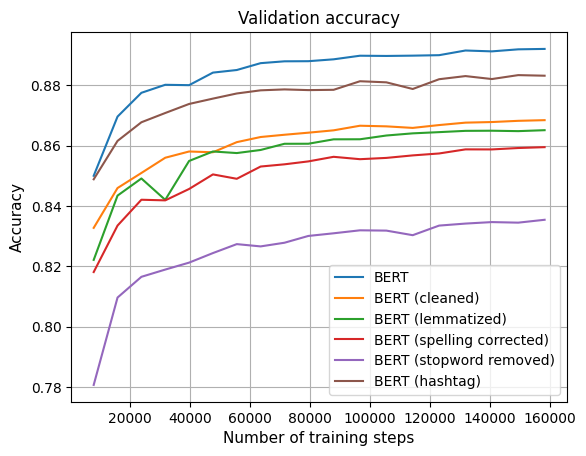

In [171]:
fig, ax = plt.subplots()
alpha = 0.0

ax.plot(steps, ema(col_to_list(f"bert_attention - {mode}/accuracy"), alpha), label="BERT")
ax.plot(steps, ema(col_to_list(f"bert_attention_cleaned - {mode}/accuracy"), alpha), label="BERT (cleaned)")
ax.plot(steps, ema(col_to_list(f"bert_attention_cleaned_lemmatized - {mode}/accuracy"), alpha), label="BERT (lemmatized)")
ax.plot(steps, ema(col_to_list(f"bert_attention_cleaned_spelling_corrected - {mode}/accuracy"), alpha), label="BERT (spelling corrected)")
ax.plot(steps, ema(col_to_list(f"bert_attention_stopword_removed - {mode}/accuracy"), alpha), label="BERT (stopword removed)")
ax.plot(steps, ema(col_to_list(f"bert_attention_hashtag - {mode}/accuracy"), alpha), label="BERT (hashtag)")

# ax.plot(steps, ema(col_to_list(f"bert_attention - {mode}/accuracy"), alpha), label="BERT")
# ax.plot(steps, ema(col_to_list(f"roberta-base_attention - {mode}/accuracy"), alpha), label="RoBERTa (base)")
# ax.plot(steps, ema(col_to_list(f"roberta-large_attention - {mode}/accuracy"), alpha), label="RoBERTa (large)")
# ax.plot(steps, ema(col_to_list(f"timelm_attention - {mode}/accuracy"), alpha), label="TimeLM")
# ax.plot(steps, ema(col_to_list(f"albert-base_attention - {mode}/accuracy"), alpha), label="AlBERT (base)")
# ax.plot(steps, ema(col_to_list(f"albert-large_attention - {mode}/accuracy"), alpha), label="AlBERT (large)")
# ax.plot(steps, ema(col_to_list(f"albert-xlarge_attention - {mode}/accuracy"), alpha), label="AlBERT (xlarge)")
# ax.plot(steps, ema(col_to_list(f"deberta-large_attention - {mode}/accuracy"), alpha), label="DeBERTa (large)")
plt.grid()
plt.xlabel('Number of training steps', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
if mode == "train":
    plt.title('Training accuracy', fontsize=12)
else:
    plt.title('Validation accuracy', fontsize=12)
plt.legend()
plt.savefig(f'{name}.png', dpi=300)
plt.show()